# Explorer un corpus

## Imports

In [38]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

import re

## Compter le nombre de documents dans le corpus

In [37]:
path = "../../data/txt/"
files = sorted(os.listdir(path))
len(files)




989

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [36]:
chaine = 'KB_JB421_1909-11-12_01-00002'
type(chaine)

str

In [35]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB421', '1909-11-12', '01-00002']

In [34]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]

In [33]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'197'

In [32]:
year[-1]

'0'

In [31]:
year[:3] + '0s'

'1970s'

## Quelques statistiques

In [30]:
all_years = [str(year) for year in range(1830, 1970)]

In [29]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        

          # Vérification : doit au minimum avoir 3 éléments (indices 0,1,2)
        if len(elems) < 3:
            print("Nom de fichier invalide :", f)
            continue
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

Anomalous file: .Rhistory
Nom de fichier invalide : _README.txt


## graphique des fichiers par décénnie

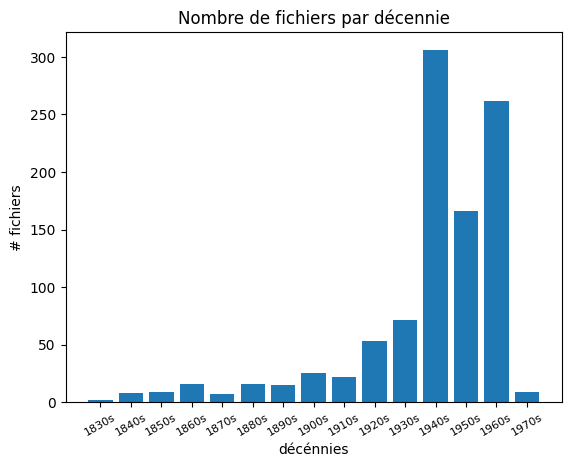

In [28]:
# Trier les décennies (chaînes comme "1830s", "1840s", ...) par valeur numérique
decades = sorted(count_decade.keys(), key=lambda x: int(x[:4]))
values = [count_decade[d] for d in decades]

index = np.arange(len(decades))
plt.bar(index,values)
plt.xlabel('décénnies')
plt.ylabel('# fichiers')
plt.xticks(index, decades, fontsize=8, rotation=30)
plt.title('Nombre de fichiers par décennie')
plt.show()

Il y a 2 fichiers pour la décennie 1830s
Il y a 8 fichiers pour la décennie 1840s
Il y a 9 fichiers pour la décennie 1850s
Il y a 16 fichiers pour la décennie 1860s
Il y a 7 fichiers pour la décennie 1870s
Il y a 16 fichiers pour la décennie 1880s
Il y a 15 fichiers pour la décennie 1890s
Il y a 25 fichiers pour la décennie 1900s
Il y a 22 fichiers pour la décennie 1910s
Il y a 53 fichiers pour la décennie 1920s
Il y a 71 fichiers pour la décennie 1930s
Il y a 306 fichiers pour la décennie 1940s
Il y a 166 fichiers pour la décennie 1950s
Il y a 262 fichiers pour la décennie 1960s
Il y a 9 fichiers pour la décennie 1970s


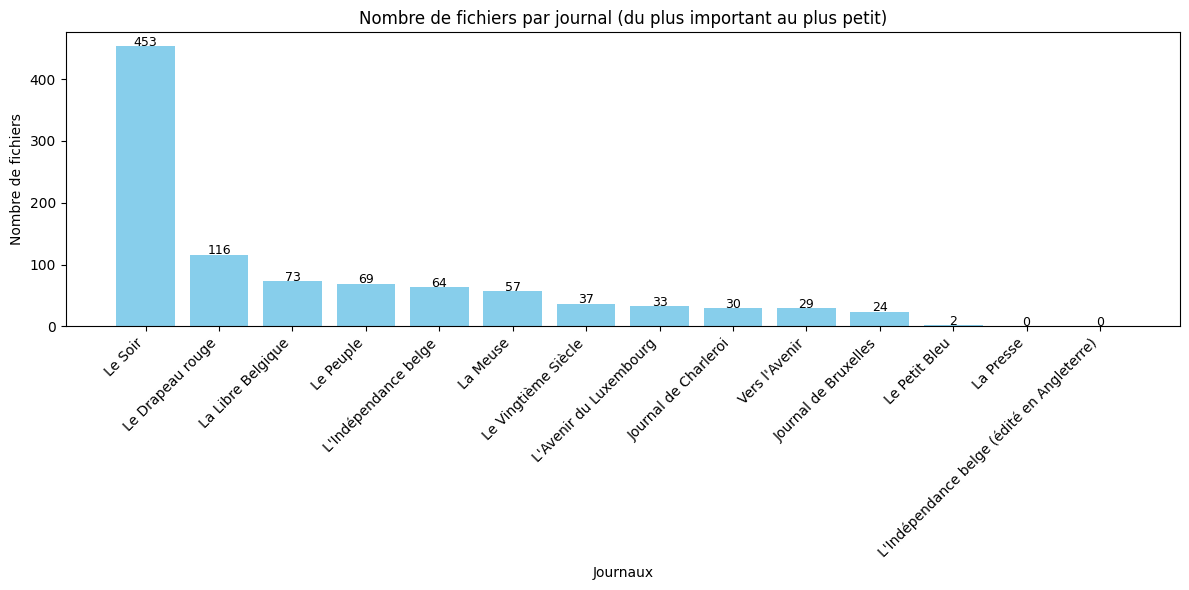

In [27]:
journaux = {
    "JB421":  "L'Avenir du Luxembourg",
    "JB427":  "La Libre Belgique",
    "JB555":  "L'Indépendance belge",
    "JB555A": "L'Indépendance belge (édité en Angleterre)",
    "JB567":  "Journal de Bruxelles",
    "JB572":  "Journal de Charleroi",
    "JB638":  "La Meuse",
    "JB685":  "Le Petit Bleu",
    "JB729":  "Le Vingtième Siècle",
    "JB773":  "Vers l'Avenir",
    "JB837":  "Le Peuple",
    "JB838":  "Le Soir",
    "JB1051": "Le Drapeau rouge",
    "B14138": "La Presse"
}

for decade in sorted(count_decade.keys()):
    print(f"Il y a {count_decade[decade]} fichiers pour la décennie {decade}")

# Récupérer noms et valeurs
noms = [nom for code, nom in journaux.items()]
valeurs = [count_newspapers[code] for code in journaux.keys()]

# Trier par nombre de fichiers décroissant
valeurs, noms = zip(*sorted(zip(valeurs, noms), reverse=True))

# Indices pour l'axe X
index = np.arange(len(noms))

# Graphique en barres
plt.figure(figsize=(12,6))
plt.bar(index, valeurs, color='skyblue')

# Labels et titre
plt.xticks(index, noms, rotation=45, ha='right', fontsize=10)
plt.ylabel("Nombre de fichiers")
plt.xlabel("Journaux")
plt.title("Nombre de fichiers par journal (du plus important au plus petit)")

# Afficher les valeurs au-dessus des barres
for i, v in enumerate(valeurs):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [26]:
# Dictionnaire pour stocker les années couvertes par journal
years_per_journal = defaultdict(set)

# Parcourir tous les fichiers
for f in files:  # files = liste de tous les noms de fichiers .txt
    if "_" in f and f.endswith(".txt"):
        elems = f.split("_")
        if len(elems) < 3:
            continue  # fichier avec format inattendu

        journal_code = elems[1]

        # Extraire l'année depuis la partie date (AAAA-MM-JJ)
        date_part = elems[2]
        match = re.match(r"(\d{4})", date_part)
        if match:
            year = int(match.group(1))
            years_per_journal[journal_code].add(year)

# Afficher le nombre de fichiers, le nombre d'années et les années extrêmes
for code, nom in journaux.items():
    n_files = count_newspapers.get(code, 0)  # nombre de fichiers pour ce journal
    if years_per_journal[code]:  # vérifier qu'il y a des années
        annees = sorted(years_per_journal[code])
        n_years = len(annees)
        print(f"{nom} ({code}) : {n_files} fichiers, {n_years} années couvertes : de {annees[0]} à {annees[-1]}")
    else:
        print(f"{nom} ({code}) : {n_files} fichiers, aucune année valide")

L'Avenir du Luxembourg (JB421) : 33 fichiers, 12 années couvertes : de 1909 à 1950
La Libre Belgique (JB427) : 73 fichiers, 18 années couvertes : de 1919 à 1950
L'Indépendance belge (JB555) : 64 fichiers, 51 années couvertes : de 1837 à 1939
L'Indépendance belge (édité en Angleterre) (JB555A) : 0 fichiers, aucune année valide
Journal de Bruxelles (JB567) : 24 fichiers, 21 années couvertes : de 1842 à 1924
Journal de Charleroi (JB572) : 30 fichiers, 19 années couvertes : de 1848 à 1950
La Meuse (JB638) : 57 fichiers, 28 années couvertes : de 1858 à 1950
Le Petit Bleu (JB685) : 2 fichiers, 2 années couvertes : de 1910 à 1919
Le Vingtième Siècle (JB729) : 37 fichiers, 23 années couvertes : de 1895 à 1940
Vers l'Avenir (JB773) : 29 fichiers, 11 années couvertes : de 1921 à 1950
Le Peuple (JB837) : 69 fichiers, 20 années couvertes : de 1913 à 1950
Le Soir (JB838) : 453 fichiers, 45 années couvertes : de 1890 à 1970
Le Drapeau rouge (JB1051) : 116 fichiers, 15 années couvertes : de 1947 à 19

## Pour le soir

Année 1890 : 1 fichiers
Année 1892 : 1 fichiers
Année 1897 : 1 fichiers
Année 1900 : 1 fichiers
Année 1902 : 1 fichiers
Année 1903 : 1 fichiers
Année 1905 : 1 fichiers
Année 1911 : 1 fichiers
Année 1920 : 2 fichiers
Année 1921 : 1 fichiers
Année 1924 : 1 fichiers
Année 1926 : 1 fichiers
Année 1928 : 1 fichiers
Année 1929 : 2 fichiers
Année 1933 : 3 fichiers
Année 1934 : 1 fichiers
Année 1935 : 1 fichiers
Année 1938 : 1 fichiers
Année 1939 : 1 fichiers
Année 1940 : 1 fichiers
Année 1946 : 8 fichiers
Année 1947 : 38 fichiers
Année 1948 : 28 fichiers
Année 1949 : 27 fichiers
Année 1950 : 8 fichiers
Année 1951 : 14 fichiers
Année 1952 : 23 fichiers
Année 1953 : 6 fichiers
Année 1954 : 12 fichiers
Année 1955 : 6 fichiers
Année 1956 : 10 fichiers
Année 1957 : 16 fichiers
Année 1958 : 9 fichiers
Année 1959 : 23 fichiers
Année 1960 : 29 fichiers
Année 1961 : 23 fichiers
Année 1962 : 18 fichiers
Année 1963 : 6 fichiers
Année 1964 : 12 fichiers
Année 1965 : 12 fichiers
Année 1966 : 27 fichiers
A

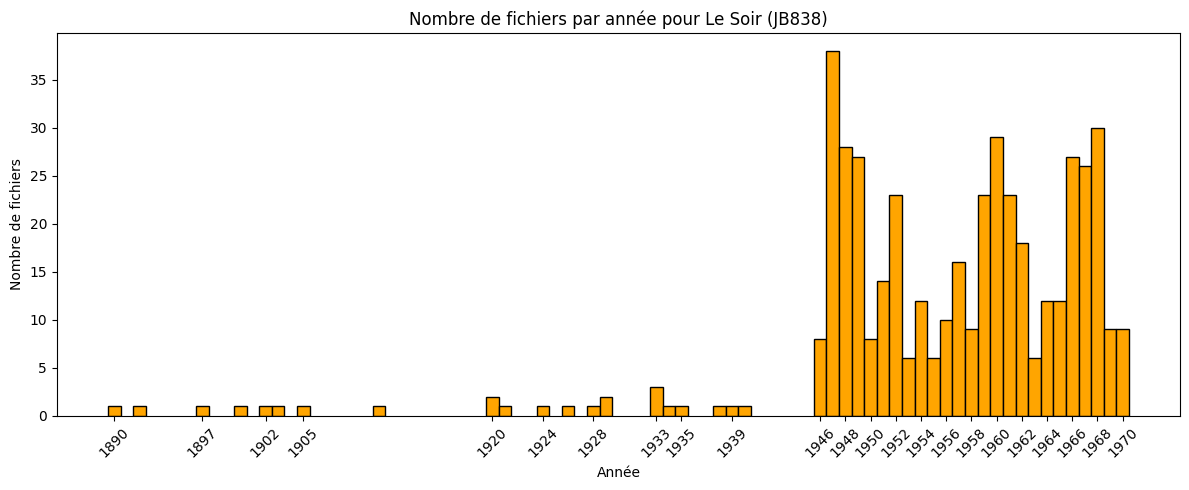

In [25]:
# Journal ciblé
journal_code = "JB838"
journal_name = journaux[journal_code]

# Compter le nombre de fichiers par année
count_year = defaultdict(int)
for f in files:
    if "_" in f and f.endswith(".txt"):
        elems = f.split("_")
        if len(elems) < 3:
            continue
        code = elems[1]
        if code != journal_code:
            continue
        date_part = elems[2]
        match = re.match(r"(\d{4})", date_part)
        if match:
            year = int(match.group(1))
            count_year[year] += 1

# Trier les années
years = sorted(count_year.keys())
values = [count_year[y] for y in years]

# Affichage console
for y, v in zip(years, values):
    print(f"Année {y} : {v} fichiers")

# Graphique avec barres alignées sur les années entières
plt.figure(figsize=(12,5))
plt.bar(years, values, width=1.0, color='orange', edgecolor='black')
plt.xlabel("Année")
plt.ylabel("Nombre de fichiers")
plt.title(f"Nombre de fichiers par année pour {journal_name} ({journal_code})")

# Afficher une année sur deux pour les ticks
plt.xticks(years[::2], rotation=45)  # ne prend qu'une année sur deux

plt.tight_layout()
plt.show()

## Pour le drapeau rouge

Année 1947 : 8 fichiers
Année 1948 : 6 fichiers
Année 1949 : 12 fichiers
Année 1950 : 2 fichiers
Année 1951 : 4 fichiers
Année 1952 : 6 fichiers
Année 1953 : 1 fichiers
Année 1954 : 1 fichiers
Année 1955 : 1 fichiers
Année 1957 : 2 fichiers
Année 1958 : 1 fichiers
Année 1959 : 2 fichiers
Année 1960 : 46 fichiers
Année 1961 : 14 fichiers
Année 1966 : 10 fichiers


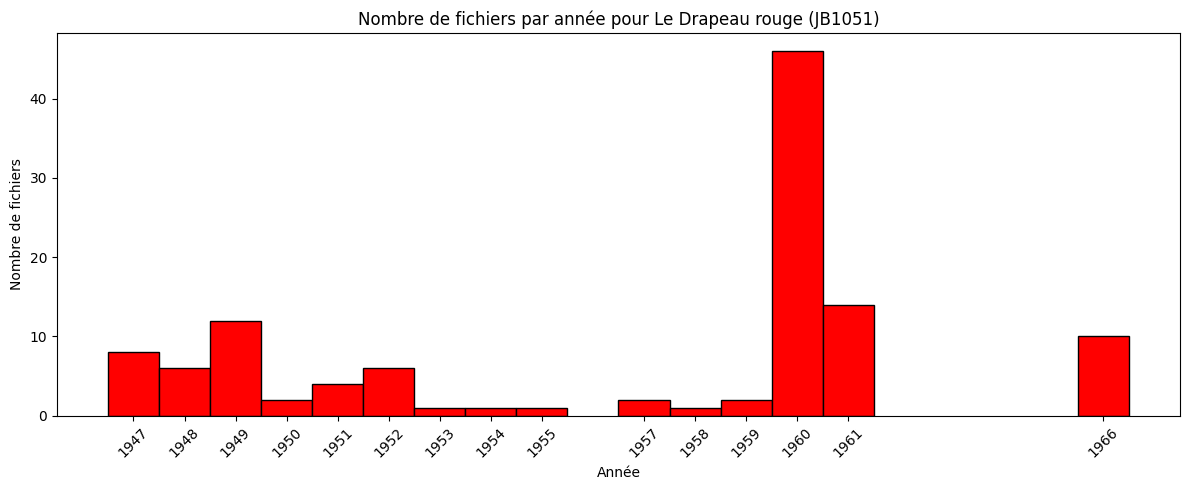

In [24]:
# Journal ciblé
journal_code = "JB1051"
journal_name = journaux[journal_code]

# Compter le nombre de fichiers par année
count_year = defaultdict(int)
for f in files:
    if "_" in f and f.endswith(".txt"):
        elems = f.split("_")
        if len(elems) < 3:
            continue
        code = elems[1]
        if code != journal_code:
            continue
        date_part = elems[2]
        match = re.match(r"(\d{4})", date_part)
        if match:
            year = int(match.group(1))
            count_year[year] += 1

# Trier les années
years = sorted(count_year.keys())  # par exemple toutes les années disponibles
values = [count_year[y] for y in years]

# Affichage console
for y, v in zip(years, values):
    print(f"Année {y} : {v} fichiers")

# Graphique avec barres alignées sur les années entières
plt.figure(figsize=(12,5))
plt.bar(years, values, width=1.0, color='red', edgecolor='black')  # width=1 pour occuper exactement l'année
plt.xlabel("Année")
plt.ylabel("Nombre de fichiers")
plt.title(f"Nombre de fichiers par année pour {journal_name} ({journal_code})")
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

## Pour la libre 

Année 1919 : 1 fichiers
Année 1920 : 1 fichiers
Année 1923 : 1 fichiers
Année 1925 : 1 fichiers
Année 1928 : 1 fichiers
Année 1929 : 3 fichiers
Année 1930 : 1 fichiers
Année 1933 : 1 fichiers
Année 1934 : 1 fichiers
Année 1937 : 1 fichiers
Année 1938 : 3 fichiers
Année 1939 : 1 fichiers
Année 1940 : 1 fichiers
Année 1946 : 7 fichiers
Année 1947 : 12 fichiers
Année 1948 : 11 fichiers
Année 1949 : 21 fichiers
Année 1950 : 5 fichiers


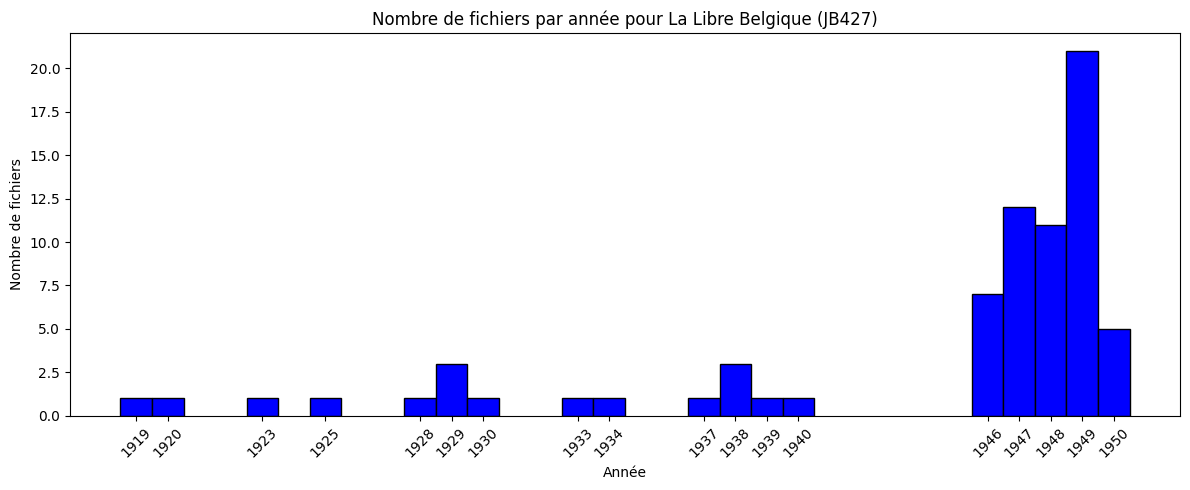

In [23]:
# Journal ciblé
journal_code = "JB427"
journal_name = journaux[journal_code]

# Compter le nombre de fichiers par année
count_year = defaultdict(int)
for f in files:
    if "_" in f and f.endswith(".txt"):
        elems = f.split("_")
        if len(elems) < 3:
            continue
        code = elems[1]
        if code != journal_code:
            continue
        date_part = elems[2]
        match = re.match(r"(\d{4})", date_part)
        if match:
            year = int(match.group(1))
            count_year[year] += 1

# Trier les années
years = sorted(count_year.keys())  # toutes les années disponibles
values = [count_year[y] for y in years]

# Affichage console
for y, v in zip(years, values):
    print(f"Année {y} : {v} fichiers")

# Graphique avec barres alignées sur les années entières
plt.figure(figsize=(12,5))
plt.bar(years, values, width=1.0, color='blue', edgecolor='black')
plt.xlabel("Année")
plt.ylabel("Nombre de fichiers")
plt.title(f"Nombre de fichiers par année pour {journal_name} ({journal_code})")
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

## Analyse compartaive des trois journaux

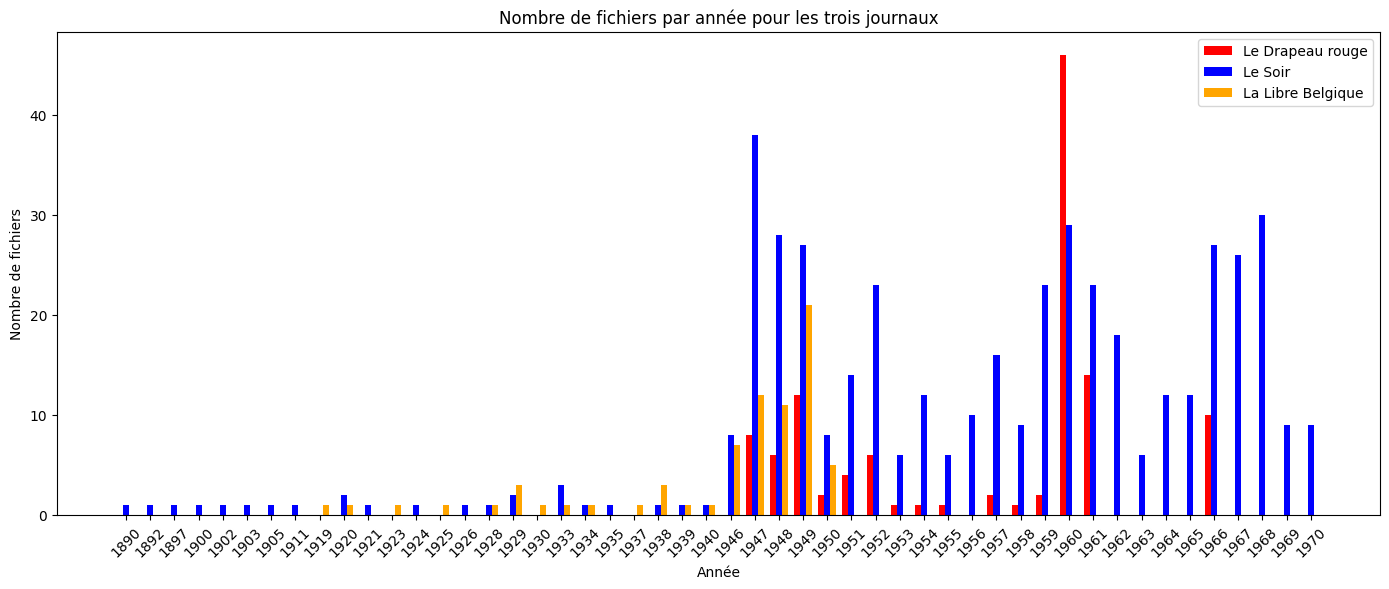

In [22]:
# Journaux ciblés avec leurs couleurs
selected_journals = {
    "JB1051": ("Le Drapeau rouge", "red"),
    "JB838": ("Le Soir", "blue"),
    "JB427": ("La Libre Belgique", "orange")
}

# Dictionnaire pour stocker le nombre de fichiers par année pour chaque journal
count_years = {code: defaultdict(int) for code in selected_journals.keys()}

# Parcourir tous les fichiers
for f in files:
    if "_" in f and f.endswith(".txt"):
        elems = f.split("_")
        if len(elems) < 3:
            continue
        code = elems[1]
        if code in selected_journals:
            date_part = elems[2]
            match = re.match(r"(\d{4})", date_part)
            if match:
                year = int(match.group(1))
                count_years[code][year] += 1

# Déterminer toutes les années couvertes par au moins un journal
all_years = sorted({year for d in count_years.values() for year in d.keys()})

# Largeur des barres et positions
bar_width = 0.25
index = np.arange(len(all_years))

# Création du graphique
plt.figure(figsize=(14,6))

for i, (code, (nom, color)) in enumerate(selected_journals.items()):
    val = [count_years[code].get(year, 0) for year in all_years]
    plt.bar(index + i*bar_width, val, width=bar_width, color=color, label=nom)

# Labels et titre
plt.xlabel("Année")
plt.ylabel("Nombre de fichiers")
plt.title("Nombre de fichiers par année pour les trois journaux")
plt.xticks(index + bar_width, all_years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Liste des années manquantes
missing_years = [y for y in all_years if y not in covered_years]

# Affichage du nombre total et de la liste
print(f"Nombre total d'années manquantes : {len(missing_years)}")
print(f"Années manquantes : {', '.join(sorted(missing_years))}")

Nombre total d'années manquantes : 33
Années manquantes : 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1838, 1840, 1841, 1843, 1844, 1851, 1852, 1854, 1855, 1856, 1859, 1862, 1871, 1872, 1873, 1875, 1877, 1893, 1899, 1915, 1916, 1917, 1918, 1941, 1942, 1944
